# Phase 1: base models
* Apply each model on base datasets(blobs, moons, circles)
* Give a short eval on how well these base models do on different datasets before tuning


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, make_circles, make_s_curve
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.utils import resample

<hr style="border:2px solid gray">

## Phase 1.1: Datasets Creation



* We will use the following datasets to allow us to compare how the different clustering algorithms perfoms
> Blobs:
>> Generated using the make_blobs function, creating 3 clusters of points.
>
> Moons:
>>Generated using the make_moons function, creating a two-class dataset with a crescent moon shape.
>
>Concentric Circles:
>>Generated using the make_circles function, creating a large circle containing a smaller circle in 2d.

<ipython-input-2-05c9b8508f29>:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(dataset[:, 0], dataset[:, 1], s=50, cmap='viridis')


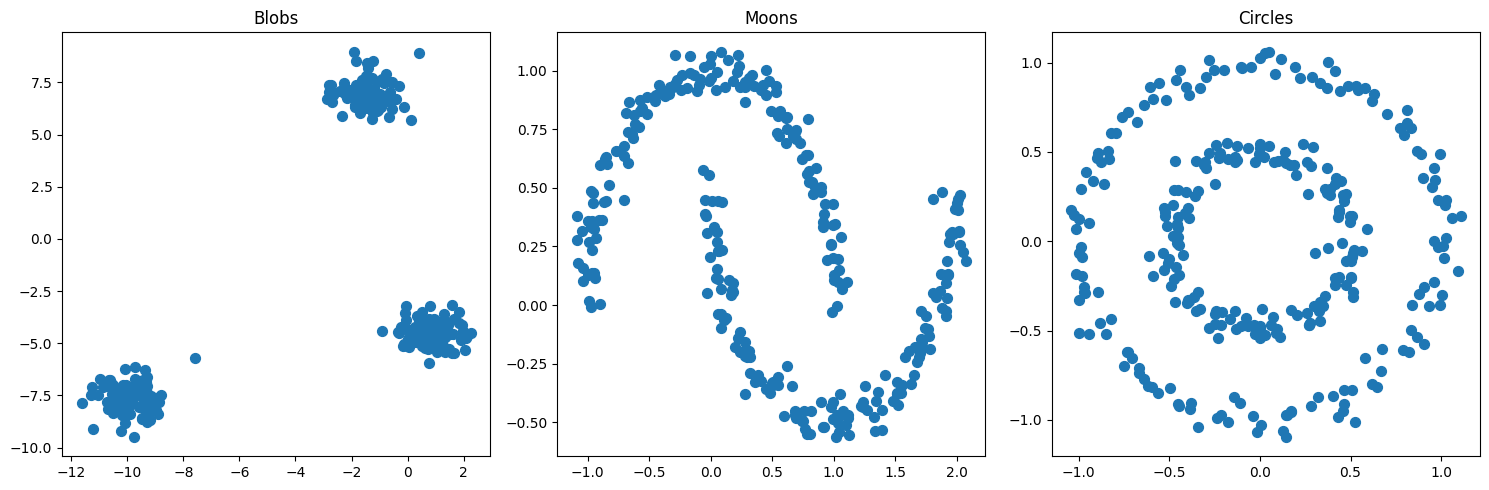

In [2]:
# Create base datasets
X_blob, y_blob = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=100)
X_moon, y_moon = make_moons(n_samples=300, noise=0.05, random_state=100)
X_circle, y_circle = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=100)

datasets = {
    'Blobs': X_blob,
    'Moons': X_moon,
    'Circles': X_circle
}


plt.figure(figsize=(15, 5))
for idx, (dataset_name, dataset) in enumerate(datasets.items()):
    plt.subplot(1, len(datasets), idx + 1)
    plt.scatter(dataset[:, 0], dataset[:, 1], s=50, cmap='viridis')
    plt.title(f"{dataset_name}")

plt.tight_layout()
plt.show()


## Phase 1.2: Algorithms used

* The different kinds of clustering algorithms are as follows:
> KMeans
>>
> DBSCAN
>>
> Agglomerative Clustering
* We will now apply these clustering algorithms on the datasets that we have created

Evaluation for Blobs:
KMeans++: Silhouette Score = 0.90, Davies-Bouldin Score = 0.14, Runtime: 0.04 seconds
DBSCAN: Silhouette Score = 0.81, Davies-Bouldin Score = 1.24, Runtime: 0.01 seconds
Agglomerative Clustering: Silhouette Score = 0.90, Davies-Bouldin Score = 0.14, Runtime: 0.01 seconds


Evaluation for Moons:
KMeans++: Silhouette Score = 0.43, Davies-Bouldin Score = 0.89, Runtime: 0.04 seconds
DBSCAN: Less than 2 clusters found, Runtime: 0.00 seconds
Agglomerative Clustering: Silhouette Score = 0.41, Davies-Bouldin Score = 0.92, Runtime: 0.00 seconds


Evaluation for Circles:
KMeans++: Silhouette Score = 0.39, Davies-Bouldin Score = 0.84, Runtime: 0.11 seconds
DBSCAN: Less than 2 clusters found, Runtime: 0.00 seconds
Agglomerative Clustering: Silhouette Score = 0.36, Davies-Bouldin Score = 0.89, Runtime: 0.00 seconds




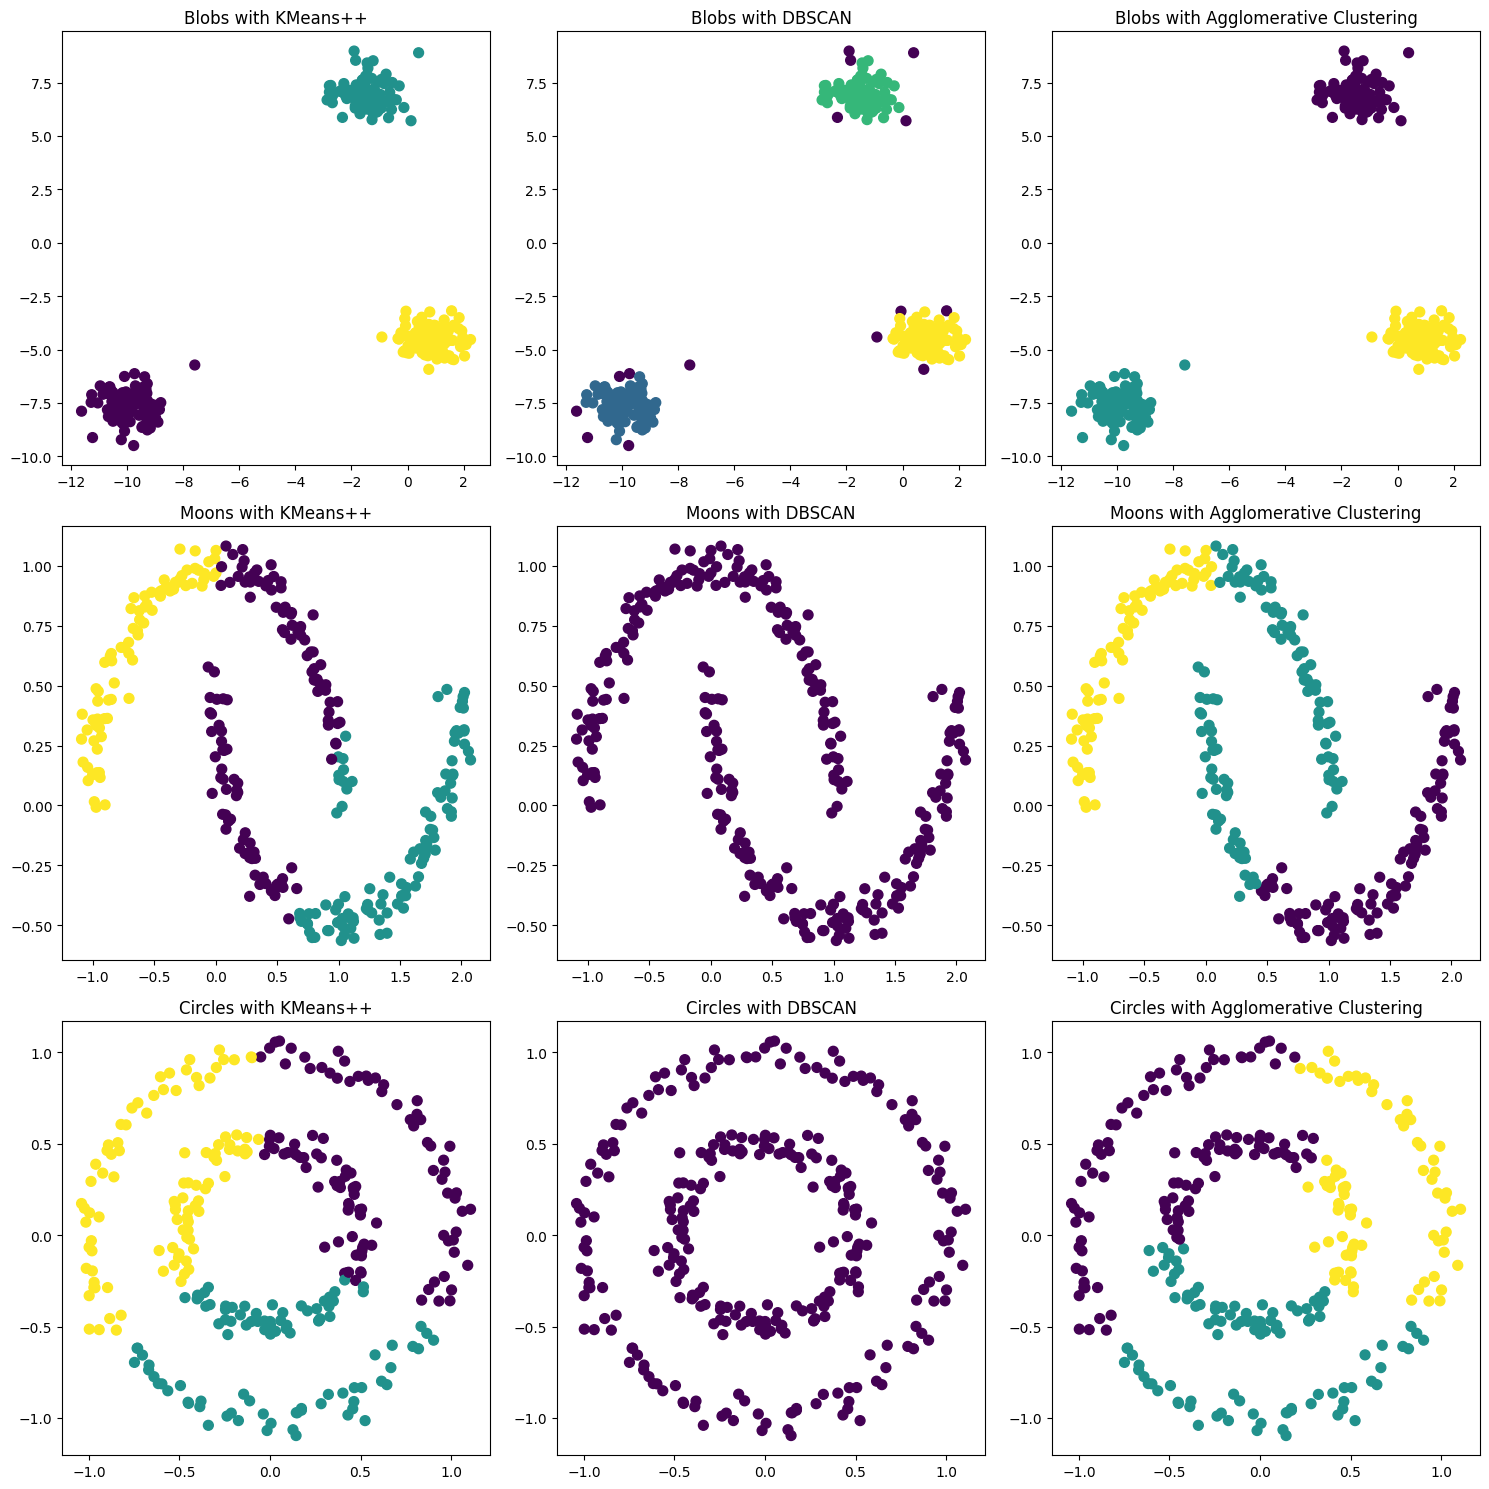

In [3]:
# Create synthetic datasets
X_blob, y_blob = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=100)
X_moon, y_moon = make_moons(n_samples=300, noise=0.05, random_state=100)
X_circle, y_circle = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=100)

datasets = {
    'Blobs': X_blob,
    'Moons': X_moon,
    'Circles': X_circle
}

algorithms = {
    'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10),
    'DBSCAN': DBSCAN(),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3)
}

for dataset_name, dataset in datasets.items():
    print(f"Evaluation for {dataset_name}:")
    for algo_name, algo in algorithms.items():
        start_time = time.time()  # start time

        cluster_labels = algo.fit_predict(dataset)

        end_time = time.time()  # end time
        runtime = end_time - start_time

        unique_labels = set(cluster_labels)

        # Exclude evaluations if the algorithm identifies less than two clusters or only noise
        if len(unique_labels) < 2 or (len(unique_labels) == 2 and -1 in unique_labels):
            print(f"{algo_name}: Less than 2 clusters found, Runtime: {runtime:.2f} seconds")
            continue

        silhouette = silhouette_score(dataset, cluster_labels)
        db_score = davies_bouldin_score(dataset, cluster_labels)

        print(f"{algo_name}: Silhouette Score = {silhouette:.2f}, Davies-Bouldin Score = {db_score:.2f}, Runtime: {runtime:.2f} seconds")

    print("\n")

plt.figure(figsize=(15, 15))
for idx, (dataset_name, dataset) in enumerate(datasets.items()):
    for jdx, (algo_name, algo) in enumerate(algorithms.items()):
        cluster_labels = algo.fit_predict(dataset)

        plt.subplot(len(datasets), len(algorithms), idx*len(algorithms) + jdx + 1)
        plt.scatter(dataset[:, 0], dataset[:, 1], c=cluster_labels, s=50, cmap='viridis')
        plt.title(f"{dataset_name} with {algo_name}")

plt.tight_layout()
plt.show()


## Phase 1.3: Evaluation Metrics


---
  * Silhouette Score:
    * Function
    > Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
    >>
    > Calculated as the mean silhouette coefficient over all the samples.
    >> (b-a)/max(a,b) where
    >
    >> a = mean distance from sample to other points in same cluster
    >
    >> b = the mean distance from sample points to points in nearest other cluster
    *  Measurement
    >>range from -1 to 1.
    >
    >>Higher silhouette scores indicate better-defined clusters,

    *  Summary: *Gives a more granular insight into the distance and cohesion of individual points within and between clusters.*
  ---
  * Davies-Bouldin Score:
    * Function
    > The score is calculated as the average similarity measure of each cluster with its most similar cluster.
    >>
    > Lower values indicate better clustering.
    * Measurement
    >> Lower bound is 0
    >
    >>Lower Davies-Bouldin scores indicate better separation and compactness between clusters.
    >
    * Summary *Gives a broader overview of clustering quality at cluster level*

## Phase 1.4: Results:

### Conclusion:
* KMeans++ and Agglomerative Clustering generally perform better on spherical clustering but performs extremely poorly on odd or complex shapes
  * Between KMeans++ and Agglomerative Clustering, Agglomerative Clustering tend to perform faster
* DBSCAN performs well on odd/ complex shapes such as the circle above
  * However, it performs poorly on spherical clustering
* We will need to explore more use cases for more in-depth analysis


# Phase 2: Hyperparameter tuning

## Phase 2.1: Introduction


---
### We will be using the Silhouette score to find the parameter that has better defined clusters

  * Silhouette Score:
    * Function
    > Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
    >>
    > Calculated as the mean silhouette coefficient over all the samples.
    >> (b-a)/max(a,b) where
    >
    >> a = mean distance from sample to other points in same cluster
    >
    >> b = the mean distance from sample points to points in nearest other cluster
    *  Measurement
    >>range from -1 to 1.
    >
    >>Higher silhouette scores indicate better-defined clusters
---
### The parameters we would like to explore are as follows
* K-means
  * n_clusters: Number of clusters
  * init: Initialization method ('k-mean s++', 'random')
* DBSCAN
  * eps: Maximum distance between two samples
  * min_samples: Number of samples for a point to be considered a core point
* Agglomerative Hierarchical Clustering (AHC)
  * n_clusters: Number of clusters
  * linkage: Linkage criteria ('ward', 'complete', 'average')
---

## Phase 2.2: Grid Search

### Phase 2.2.1: Grid Search for Blobs

In [4]:
from sklearn.model_selection import ParameterGrid

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# parameter grids
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 500, 1000]
}


param_grid_dbscan = {
    'eps': [0.1, 0.3, 0.5, 0.7, 0.9, 1.1],
    'min_samples': [2, 5, 10, 15, 20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


param_grid_ahc = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
}


# Results
results_kmeans = []
results_dbscan = []
results_ahc = []

# Grid search
for params in ParameterGrid(param_grid_kmeans):
    kmeans = KMeans(**params)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    results_kmeans.append({'params': params, 'silhouette_score': score})

for params in ParameterGrid(param_grid_dbscan):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # To ensure there's more than one cluster
        score = silhouette_score(X, labels)
        results_dbscan.append({'params': params, 'silhouette_score': score})

for params in ParameterGrid(param_grid_ahc):
    if params.get('linkage') == 'ward' or params.get('metric') != 'euclidean':
        continue  # Skip this iteration
    ahc = AgglomerativeClustering(**params)
    labels = ahc.fit_predict(X)
    score = silhouette_score(X, labels)
    results_ahc.append({'params': params, 'silhouette_score': score})


In [5]:
# Sort by silhouette_score
sorted_results_kmeans = sorted(results_kmeans, key=lambda x: x['silhouette_score'], reverse=True)
sorted_results_dbscan = sorted(results_dbscan, key=lambda x: x['silhouette_score'], reverse=True)
sorted_results_ahc = sorted(results_ahc, key=lambda x: x['silhouette_score'], reverse=True)

Sorted Kmeans results to find the best hyperparameter based on sihouette_score

In [6]:
sorted_results_kmeans[0]

{'params': {'init': 'k-means++',
  'max_iter': 300,
  'n_clusters': 3,
  'n_init': 10},
 'silhouette_score': 0.6596332095691734}

Sorted DBSCAN results to find the best hyperparameter based on sihouette_score

In [7]:
sorted_results_dbscan[0]

{'params': {'algorithm': 'auto', 'eps': 0.7, 'min_samples': 15},
 'silhouette_score': 0.6095821130584774}

Sorted AHC results to find the best hyperparameter based on sihouette_score

In [8]:
sorted_results_ahc[0]

{'params': {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 3},
 'silhouette_score': 0.6566748652104125}

### Phase 2.2.2: Grid search for Moons

In [9]:
X,_ = make_moons(n_samples=300, noise=0.05, random_state=100)
#Grid Search for Moons
#Results
results_kmeans = []
results_dbscan = []
results_ahc = []

for params in ParameterGrid(param_grid_kmeans):
    kmeans = KMeans(**params)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    results_kmeans.append({'params': params, 'silhouette_score': score})

for params in ParameterGrid(param_grid_dbscan):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # To ensure there's more than one cluster
        score = silhouette_score(X, labels)
        results_dbscan.append({'params': params, 'silhouette_score': score})

for params in ParameterGrid(param_grid_ahc):
    if params.get('linkage') == 'ward' or params.get('metric') != 'euclidean':
        continue  # Skip this iteration
    ahc = AgglomerativeClustering(**params)
    labels = ahc.fit_predict(X)
    score = silhouette_score(X, labels)
    results_ahc.append({'params': params, 'silhouette_score': score})

In [10]:
#Sort by silhouette_score
sorted_results_kmeans = sorted(results_kmeans, key=lambda x: x['silhouette_score'], reverse=True)
sorted_results_dbscan = sorted(results_dbscan, key=lambda x: x['silhouette_score'], reverse=True)
sorted_results_ahc = sorted(results_ahc, key=lambda x: x['silhouette_score'], reverse=True)

Sorted Kmeans results to find the best hyperparameter based on sihouette_score

In [11]:
sorted_results_kmeans[0]

{'params': {'init': 'random', 'max_iter': 300, 'n_clusters': 8, 'n_init': 20},
 'silhouette_score': 0.5327641157903226}

Sorted DBSCAN results to find the best hyperparameter based on sihouette_score

In [12]:
sorted_results_dbscan[0]

{'params': {'algorithm': 'auto', 'eps': 0.1, 'min_samples': 5},
 'silhouette_score': 0.38779444149783643}

Sorted AHC results to find the best hyperparameter based on sihouette_score

In [13]:
sorted_results_ahc[0]

{'params': {'linkage': 'complete', 'metric': 'euclidean', 'n_clusters': 9},
 'silhouette_score': 0.5124680052614731}

### Phase 2.2.3: Grid Search for Circles

In [14]:
X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=100)

# Results
results_kmeans = []
results_dbscan = []
results_ahc = []

# Grid search
for params in ParameterGrid(param_grid_kmeans):
    kmeans = KMeans(**params)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    results_kmeans.append({'params': params, 'silhouette_score': score})


for params in ParameterGrid(param_grid_dbscan):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        results_dbscan.append({'params': params, 'silhouette_score': score})

for params in ParameterGrid(param_grid_ahc):
    if params.get('linkage') == 'ward' or params.get('metric') != 'euclidean':
        continue  # Skip this iteration
    ahc = AgglomerativeClustering(**params)
    labels = ahc.fit_predict(X)
    score = silhouette_score(X, labels)
    results_ahc.append({'params': params, 'silhouette_score': score})

In [15]:
# Sort by silhouette_score
sorted_results_kmeans = sorted(results_kmeans, key=lambda x: x['silhouette_score'], reverse=True)
sorted_results_dbscan = sorted(results_dbscan, key=lambda x: x['silhouette_score'], reverse=True)
sorted_results_ahc = sorted(results_ahc, key=lambda x: x['silhouette_score'], reverse=True)

Sorted Kmeans results to find the best hyperparameter based on sihouette_score

In [16]:
sorted_results_kmeans[0]

{'params': {'init': 'k-means++',
  'max_iter': 300,
  'n_clusters': 10,
  'n_init': 20},
 'silhouette_score': 0.43725309456689276}

Sorted DBSCAN results to find the best hyperparameter based on sihouette_score

In [17]:
sorted_results_dbscan[0]

{'params': {'algorithm': 'auto', 'eps': 0.1, 'min_samples': 2},
 'silhouette_score': 0.2641065413023739}

Sorted AHC results to find the best hyperparameter based on sihouette_score

In [18]:
sorted_results_ahc[0]

{'params': {'linkage': 'average', 'metric': 'euclidean', 'n_clusters': 10},
 'silhouette_score': 0.40153713420783266}

# Plots using the best hyperparameter after grid search

In [19]:
# Algorithms defined with optimal parameters
kmeans_blob = KMeans(init='k-means++', max_iter=300, n_clusters=3, n_init=10, random_state=0)
dbscan_blob = DBSCAN(algorithm='auto', eps=0.7, min_samples=15)
agglomerative_blob = AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=3)

kmeans_moon = KMeans(init='k-means++', max_iter=300, n_clusters=8, n_init=30, random_state=0)
dbscan_moon = DBSCAN(algorithm='auto', eps=0.1, min_samples=5)
agglomerative_moon = AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=9)

kmeans_circle = KMeans(init='k-means++', max_iter=1000, n_clusters=10, n_init=10, random_state=0)
dbscan_circle = DBSCAN(algorithm='auto', eps=0.1, min_samples=2)
agglomerative_circle = AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=10)

# Group algorithms by dataset
algorithms_optimal = {
    'Blobs': {'KMeans++': kmeans_blob, 'DBSCAN': dbscan_blob, 'Agglomerative Clustering': agglomerative_blob},
    'Moons': {'KMeans++': kmeans_moon, 'DBSCAN': dbscan_moon, 'Agglomerative Clustering': agglomerative_moon},
    'Circles': {'KMeans++': kmeans_circle, 'DBSCAN': dbscan_circle, 'Agglomerative Clustering': agglomerative_circle}
}

In [20]:
for dataset_name, dataset in datasets.items():
    print(f"Evaluation for {dataset_name}:")
    for algo_name, algo in algorithms_optimal[dataset_name].items():

        start_time = time.time()
        cluster_labels = algo.fit_predict(dataset)
        end_time = time.time()

        runtime = end_time - start_time
        unique_labels = set(cluster_labels)

        if len(unique_labels) < 2 or (len(unique_labels) == 2 and -1 in unique_labels):
            print(f"{algo_name}: Less than 2 clusters found, Runtime: {runtime:.2f} seconds")
            continue

        silhouette = silhouette_score(dataset, cluster_labels)
        db_score = davies_bouldin_score(dataset, cluster_labels)
        print(f"{algo_name}: Silhouette Score = {silhouette:.2f}, Davies-Bouldin Score = {db_score:.2f}, Runtime: {runtime:.2f} seconds")

    print("\n")

Evaluation for Blobs:
KMeans++: Silhouette Score = 0.90, Davies-Bouldin Score = 0.14, Runtime: 0.02 seconds
DBSCAN: Silhouette Score = 0.84, Davies-Bouldin Score = 1.27, Runtime: 0.00 seconds
Agglomerative Clustering: Silhouette Score = 0.90, Davies-Bouldin Score = 0.14, Runtime: 0.00 seconds


Evaluation for Moons:
KMeans++: Silhouette Score = 0.53, Davies-Bouldin Score = 0.55, Runtime: 0.20 seconds
DBSCAN: Silhouette Score = 0.39, Davies-Bouldin Score = 2.04, Runtime: 0.01 seconds
Agglomerative Clustering: Silhouette Score = 0.51, Davies-Bouldin Score = 0.55, Runtime: 0.01 seconds


Evaluation for Circles:
KMeans++: Silhouette Score = 0.41, Davies-Bouldin Score = 0.78, Runtime: 0.19 seconds
DBSCAN: Silhouette Score = 0.26, Davies-Bouldin Score = 2.88, Runtime: 0.00 seconds
Agglomerative Clustering: Silhouette Score = 0.40, Davies-Bouldin Score = 0.77, Runtime: 0.00 seconds




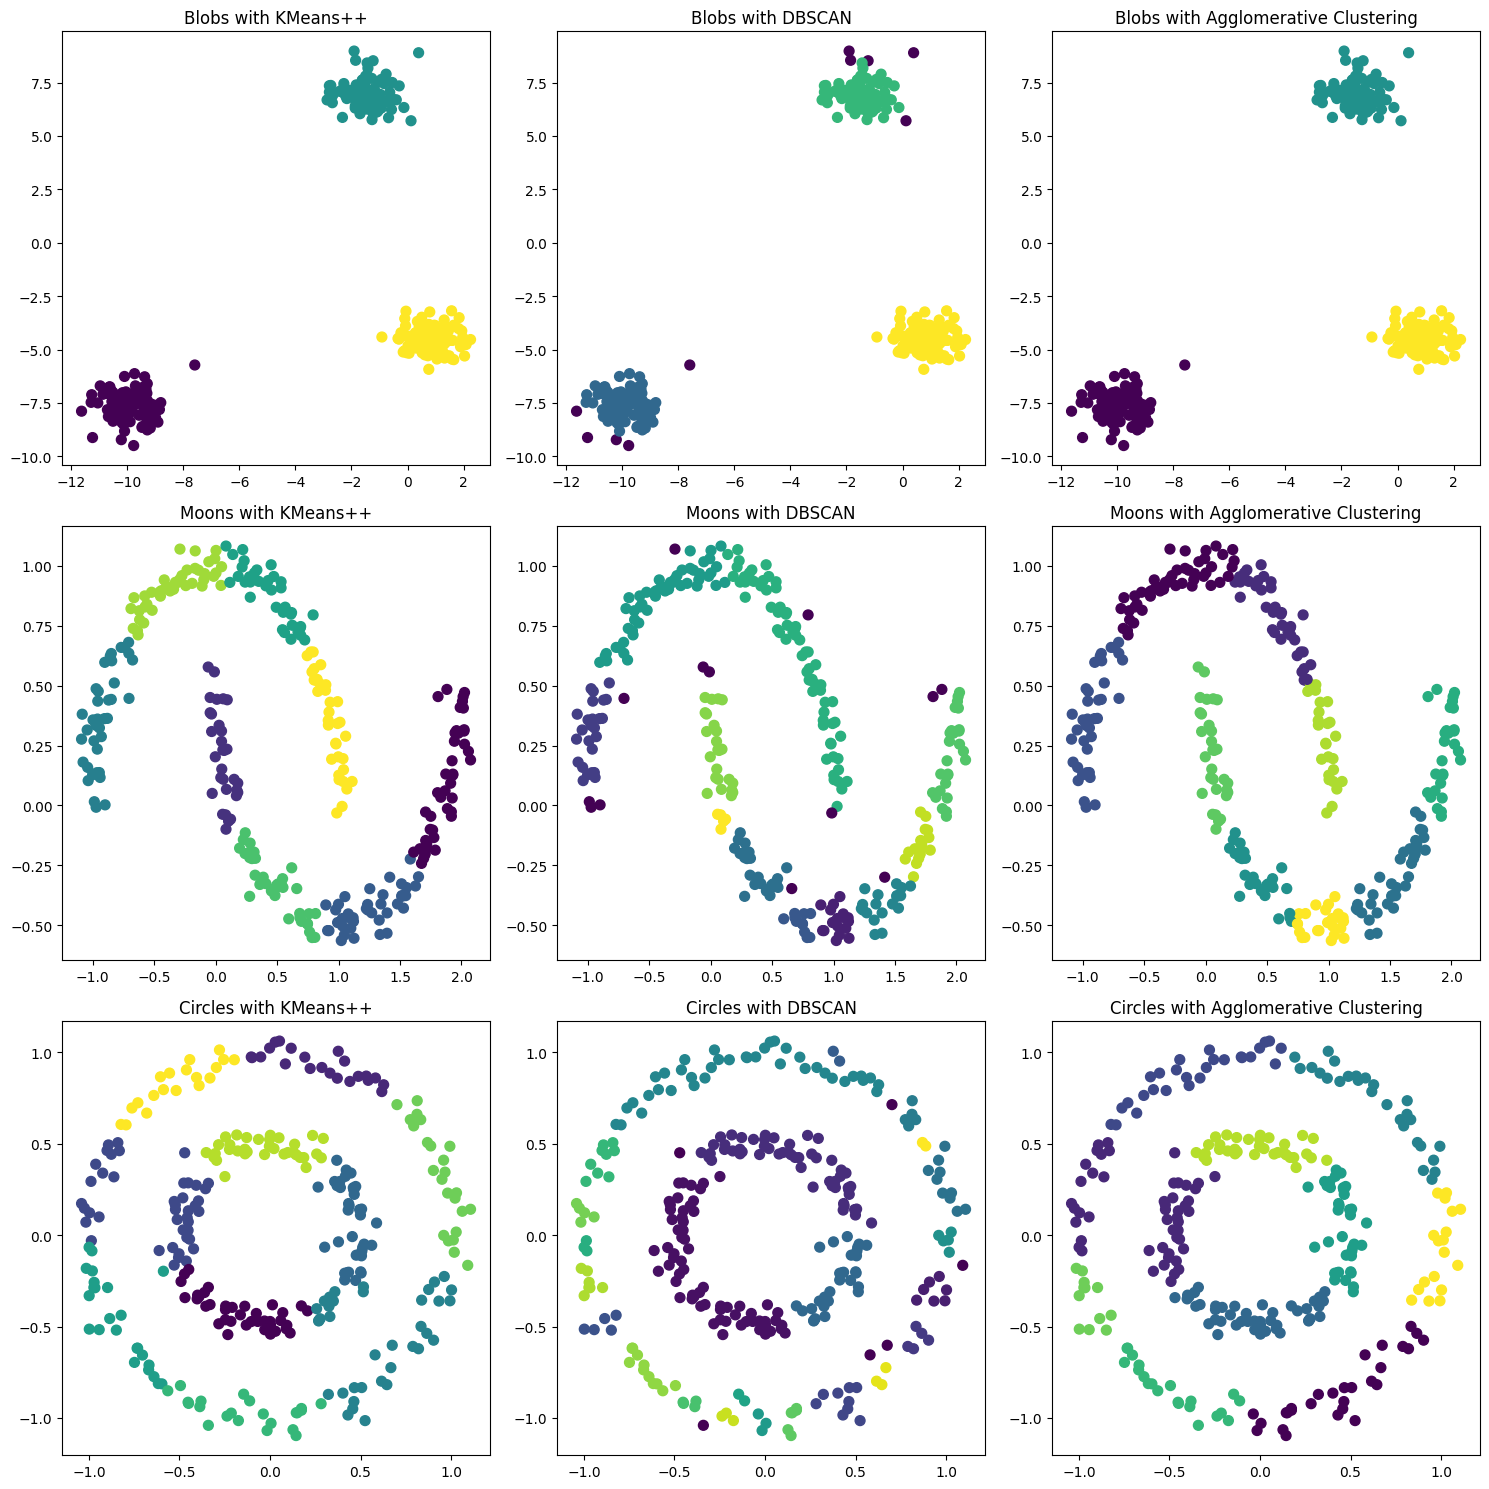

In [21]:
plt.figure(figsize=(15, 15))
for idx, (dataset_name, dataset) in enumerate(datasets.items()):
    for jdx, (algo_name, algo) in enumerate(algorithms_optimal[dataset_name].items()):
        cluster_labels = algo.fit_predict(dataset)

        plt.subplot(len(datasets), len(algorithms_optimal[dataset_name]), idx*len(algorithms_optimal[dataset_name]) + jdx + 1)
        plt.scatter(dataset[:, 0], dataset[:, 1], c=cluster_labels, s=50, cmap='viridis')
        plt.title(f"{dataset_name} with {algo_name}")

plt.tight_layout()
plt.show()

## Phase 2.3: Hyperparameter Sensitivity

### Phase 2.3.1: Blob Shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

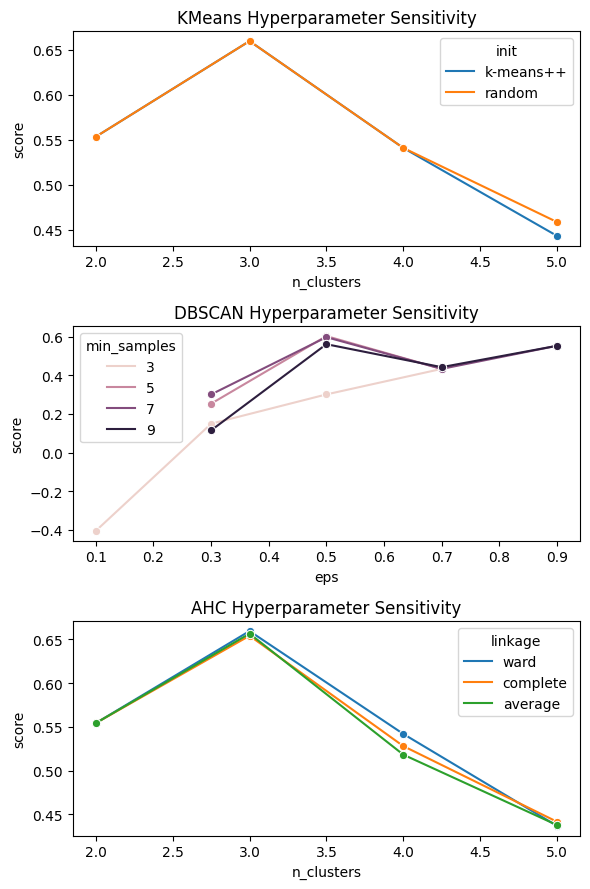

In [22]:

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Parameter grids
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random']
}

param_grid_dbscan = {
    'eps': [0.1, 0.3, 0.5, 0.7, 0.9],
    'min_samples': [3, 5, 7, 9]
}

param_grid_ahc = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average']
}

# Eun clustering and compute silhouette score
def run_clustering(algo, X):
    algo.fit(X)
    if hasattr(algo, 'labels_'):
        cluster_labels = algo.labels_
    else:
        cluster_labels = algo.predict(X)
    n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
    if n_clusters > 1:
        score = silhouette_score(X, cluster_labels)
    else:
        score = None
    return score

# Perform grid search on hyperparameters
def perform_grid_search(algo, param_grid, X):
    grid = ParameterGrid(param_grid)
    scores = []
    for params in grid:
        algo.set_params(**params)
        score = run_clustering(algo, X)
        # Only append scores if a score could be computed
        if score is not None:
            scores.append({**params, 'score': score})
    return pd.DataFrame(scores)


kmeans_scores = perform_grid_search(KMeans(), param_grid_kmeans, X)


dbscan_scores = perform_grid_search(DBSCAN(), param_grid_dbscan, X)

ahc_scores = perform_grid_search(AgglomerativeClustering(), param_grid_ahc, X)

fig, axs = plt.subplots(3, 1, figsize=(6, 9))

sns.lineplot(data=kmeans_scores, x='n_clusters', y='score', hue='init', marker='o', ax=axs[0])
axs[0].set_title('KMeans Hyperparameter Sensitivity')

sns.lineplot(data=dbscan_scores, x='eps', y='score', hue='min_samples', marker='o', ax=axs[1])
axs[1].set_title('DBSCAN Hyperparameter Sensitivity')

sns.lineplot(data=ahc_scores, x='n_clusters', y='score', hue='linkage', marker='o', ax=axs[2])
axs[2].set_title('AHC Hyperparameter Sensitivity')

plt.tight_layout()
plt.show()


### Phase 2.3.1: Blob Hyperparams
* 'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10),
* 'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
* 'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3, linkage='ward')

### Phase 2.3.2: Moon shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

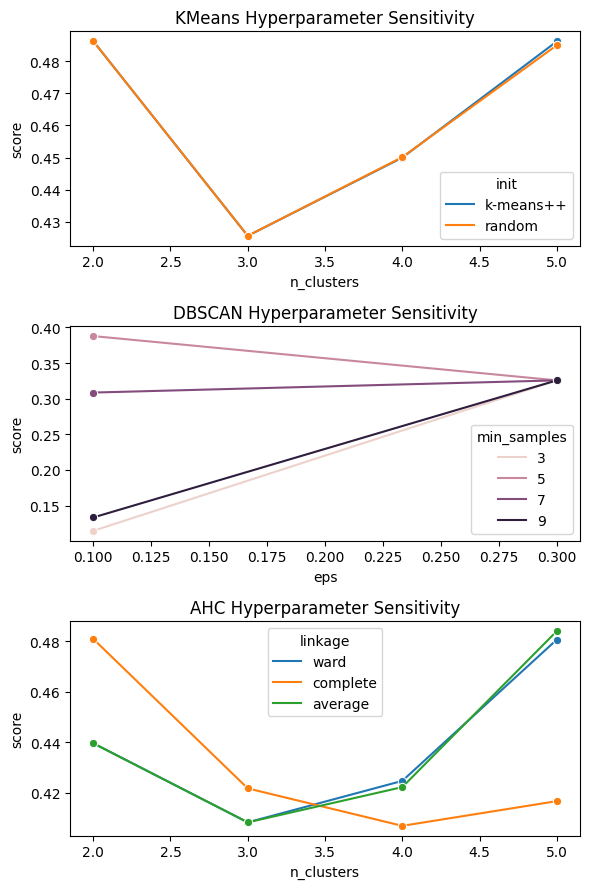

In [23]:
# Create X is your data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=100)

# Parameter grids for each algorithm
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random']
}

param_grid_dbscan = {
    'eps': [0.1, 0.3, 0.5, 0.7, 0.9],
    'min_samples': [3, 5, 7, 9]
}

param_grid_ahc = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average']
}

# KMeans
kmeans_scores = perform_grid_search(KMeans(), param_grid_kmeans, X)

# DBSCAN
dbscan_scores = perform_grid_search(DBSCAN(), param_grid_dbscan, X)

# Agglomerative Hierarchical Clustering
ahc_scores = perform_grid_search(AgglomerativeClustering(), param_grid_ahc, X)

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(6, 9))

sns.lineplot(data=kmeans_scores, x='n_clusters', y='score', hue='init', marker='o', ax=axs[0])
axs[0].set_title('KMeans Hyperparameter Sensitivity')

sns.lineplot(data=dbscan_scores, x='eps', y='score', hue='min_samples', marker='o', ax=axs[1])
axs[1].set_title('DBSCAN Hyperparameter Sensitivity')

sns.lineplot(data=ahc_scores, x='n_clusters', y='score', hue='linkage', marker='o', ax=axs[2])
axs[2].set_title('AHC Hyperparameter Sensitivity')

plt.tight_layout()
plt.show()


### Phase 2.3.2: Moon Hyperparams
* 'KMeans++': KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10),
* 'DBSCAN': DBSCAN(eps=0.100, min_samples=5),
* 'Agglomerative Clustering': AgglomerativeClustering(n_clusters=2, linkage='complete')

### Phase 2.3.3: Circles Shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

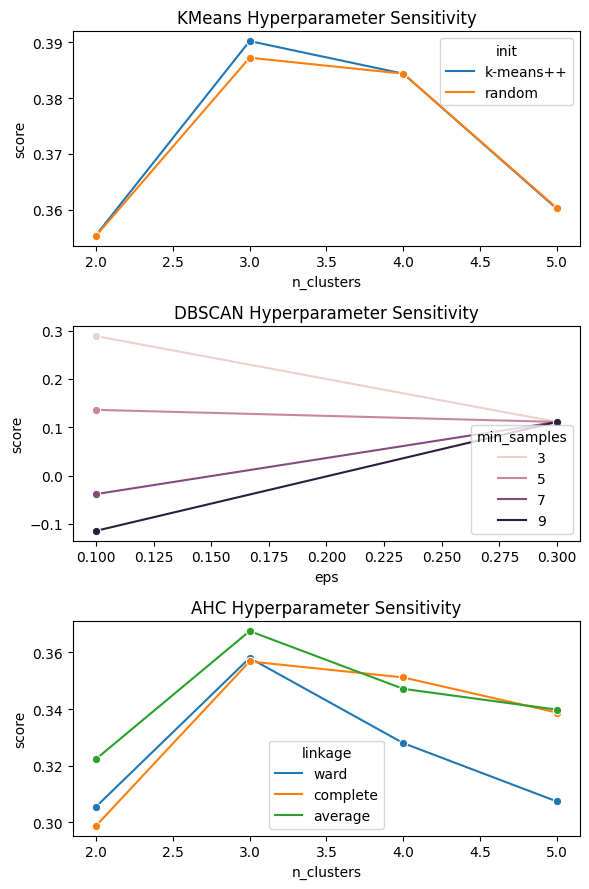

In [24]:

X, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=100)

# Parameter grids for each algorithm
param_grid_kmeans = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random']
}

param_grid_dbscan = {
    'eps': [0.1, 0.3, 0.5, 0.7, 0.9],
    'min_samples': [3, 5, 7, 9]
}

param_grid_ahc = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average']
}


# KMeans
kmeans_scores = perform_grid_search(KMeans(), param_grid_kmeans, X)

# DBSCAN
dbscan_scores = perform_grid_search(DBSCAN(), param_grid_dbscan, X)

# Agglomerative Hierarchical Clustering
ahc_scores = perform_grid_search(AgglomerativeClustering(), param_grid_ahc, X)

# Visualization
fig, axs = plt.subplots(3, 1, figsize=(6, 9))

sns.lineplot(data=kmeans_scores, x='n_clusters', y='score', hue='init', marker='o', ax=axs[0])
axs[0].set_title('KMeans Hyperparameter Sensitivity')

sns.lineplot(data=dbscan_scores, x='eps', y='score', hue='min_samples', marker='o', ax=axs[1])
axs[1].set_title('DBSCAN Hyperparameter Sensitivity')

sns.lineplot(data=ahc_scores, x='n_clusters', y='score', hue='linkage', marker='o', ax=axs[2])
axs[2].set_title('AHC Hyperparameter Sensitivity')

plt.tight_layout()
plt.show()


### Phase 2.3.3: Circles Hyperparams
* 'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10),
* 'DBSCAN': DBSCAN(eps=0.100, min_samples=3),
* 'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3, linkage='average')

## Phase 2.4: Manual Search

### 2.4.1 Manual Hyperparameter Tuning for Kmeans using the elbow method

Dataset: Blobs



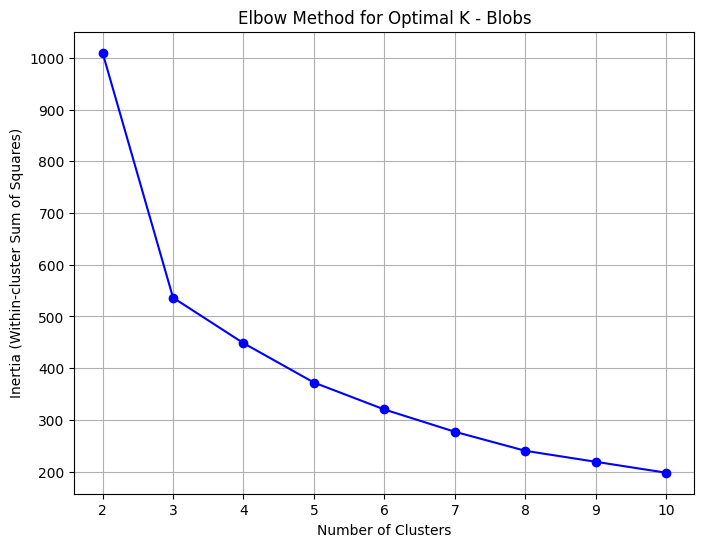

Dataset: Moons



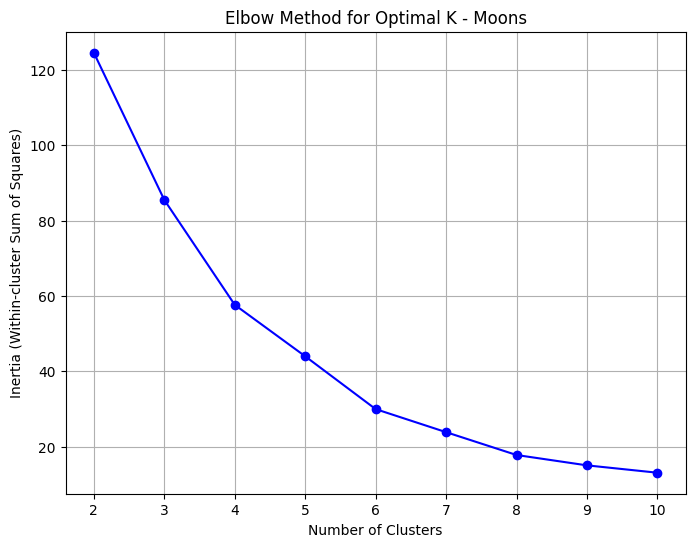

Dataset: Circles



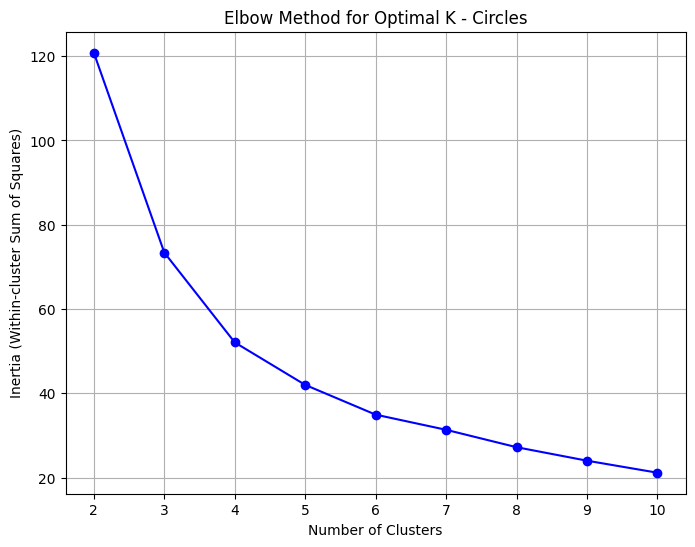

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# Create a range of possible cluster numbers
cluster_range = range(2, 11)

# Define the list of datasets
datasets = [
    ("Blobs", make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)),
    ("Moons", make_moons(n_samples=300, noise=0.1, random_state=0)),
    ("Circles", make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0))
]

for dataset_name, (X, y) in datasets:
    print(f"Dataset: {dataset_name}\n")

    inertia_scores = []  # Initialize the list to store inertia scores for each dataset

    for n_clusters in cluster_range:
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
        kmeans.fit(X)
        inertia_scores.append(kmeans.inertia_)

    # Plot the elbow curve for each dataset
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia_scores, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Within-cluster Sum of Squares)')
    plt.title(f'Elbow Method for Optimal K - {dataset_name}')
    plt.grid(True)
    plt.show()


Optimal number of clusters for Blobs = 3

Optimal number of clusters for Moon = 6

Optimal number of clusters for Circles = 4

### Phase 2.4.2: Manual Hyperparameter Tuning for DBSCAN by using K-distance graph

Generally, MinPts should be greater than or equal to the dimensionality of the data set. For 2-dimensional data, use DBSCAN's default value of MinPts = 4 (Ester et al., 1996)

Dataset: Blobs



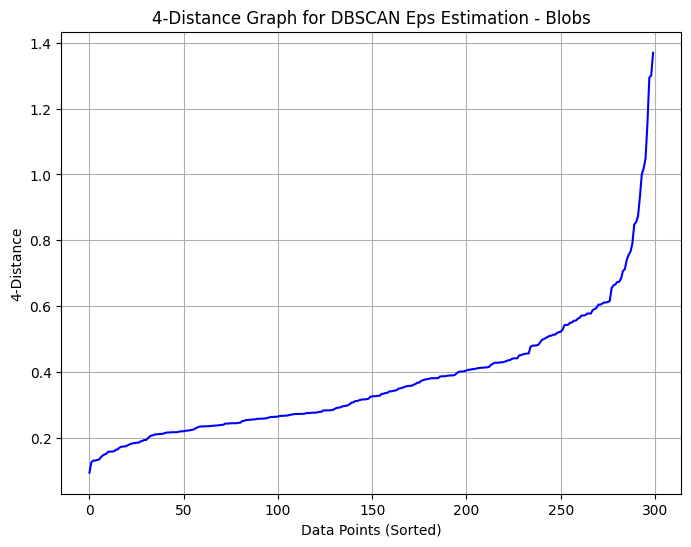

Dataset: Moons



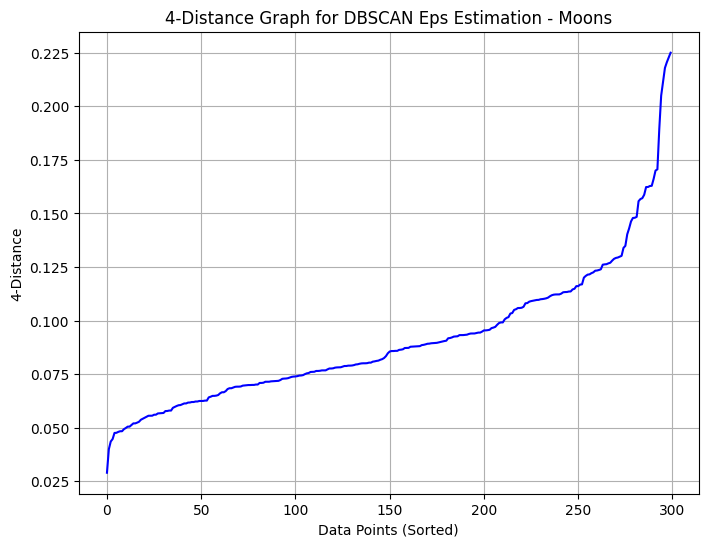

Dataset: Circles



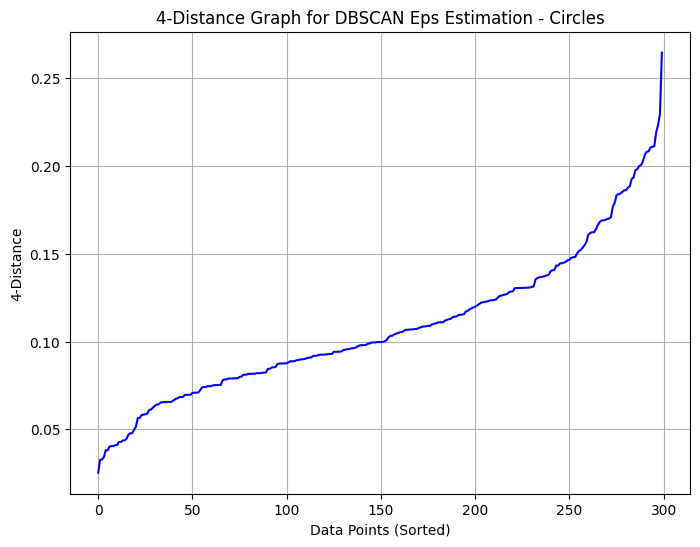

In [26]:
from sklearn.neighbors import NearestNeighbors

datasets = [
    ("Blobs", make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)),
    ("Moons", make_moons(n_samples=300, noise=0.1, random_state=0)),
    ("Circles", make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0))
]


k_values = 4

for dataset_name, (X, y) in datasets:
    print(f"Dataset: {dataset_name}\n")

    knn = NearestNeighbors(n_neighbors=k_values)
    knn.fit(X)
    distances, _ = knn.kneighbors(X)

    # plot the k-distance graph
    sorted_distances = np.sort(distances[:, -1])
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(X)), sorted_distances, linestyle='-', color='b')
    plt.xlabel('Data Points (Sorted)')
    plt.ylabel(f'{k_values}-Distance')
    plt.title(f'{k_values}-Distance Graph for DBSCAN Eps Estimation - {dataset_name}')
    plt.grid(True)
    plt.show()


Optimal eps for Blops = 0.7

Optimal eps for Moons = 0.175

Optimal eps for Circles = 0.2

### Phase 2.4.3: Manual Hyperparameter Tuning using dendrogram

Dataset: Blobs

Linkage method: single



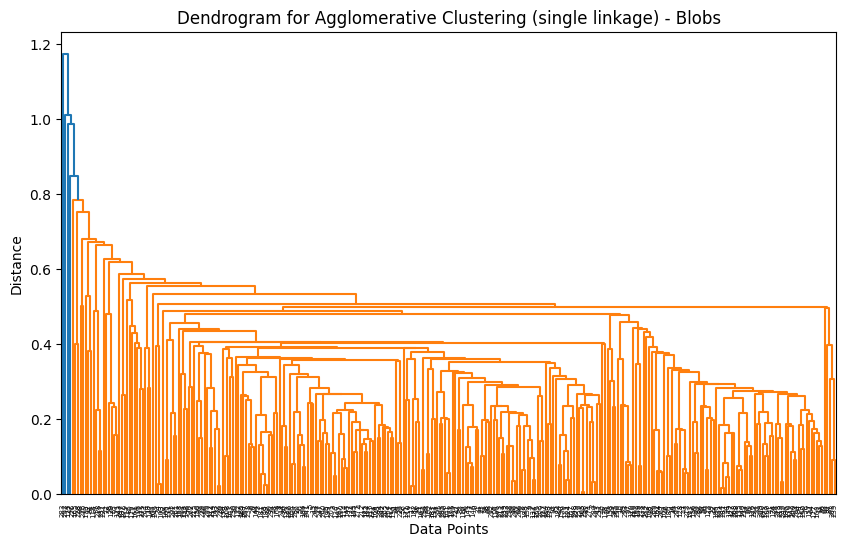

Linkage method: complete



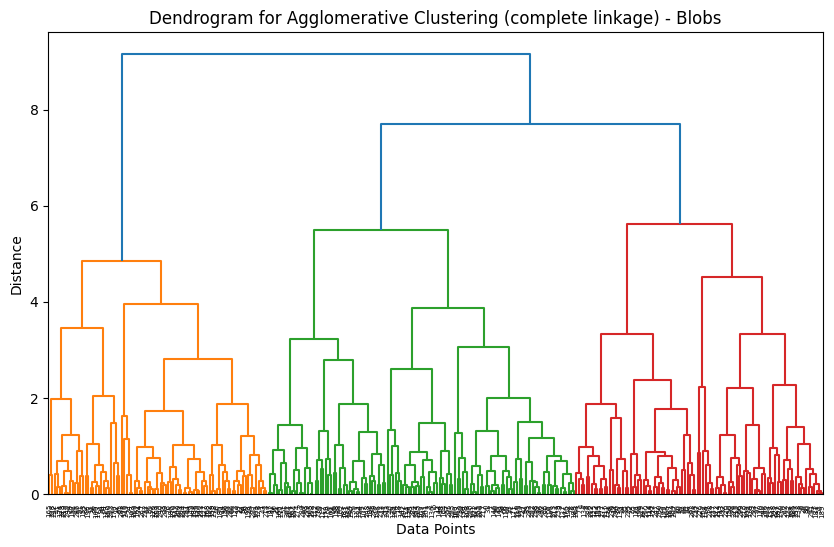

Linkage method: average



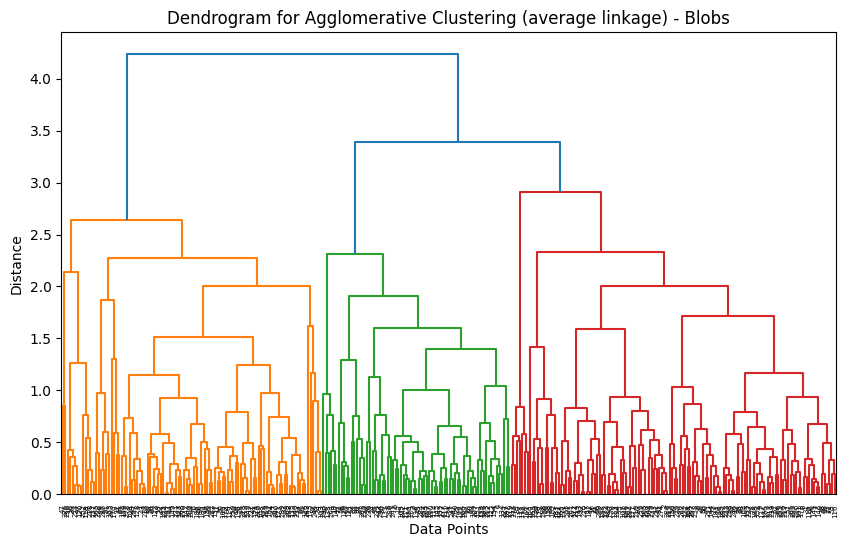

Linkage method: centroid



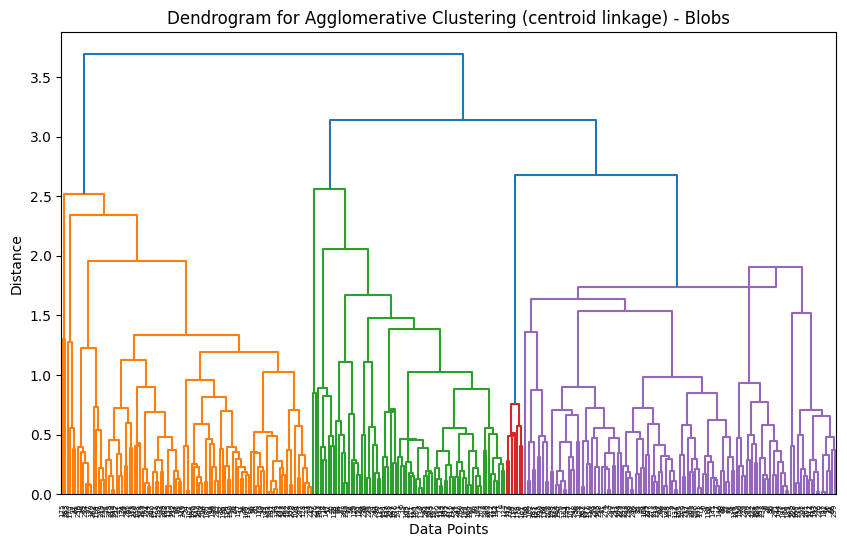

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage


# Define the list of datasets
datasets2 = [
    ("Blobs", make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=0)),
]
linkage_methods = ['single', 'complete', 'average', 'centroid']

for dataset_name, (X, y) in datasets2:
    print(f"Dataset: {dataset_name}\n")

    for linkage_method in linkage_methods:
        print(f"Linkage method: {linkage_method}\n")

        Z = linkage(X, method=linkage_method)

        plt.figure(figsize=(10, 6))
        dendrogram(Z)
        plt.title(f'Dendrogram for Agglomerative Clustering ({linkage_method} linkage) - {dataset_name}')
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        plt.show()


Optimal number of clusters for Blobs(single): 1

Optimal number of clusters for Blobs(complete): 3

Optimal number of clusters for Blobs(average): 3

Optimal number of clusters for Blobs(centroid): 4


Dataset: Moons

Linkage method: single



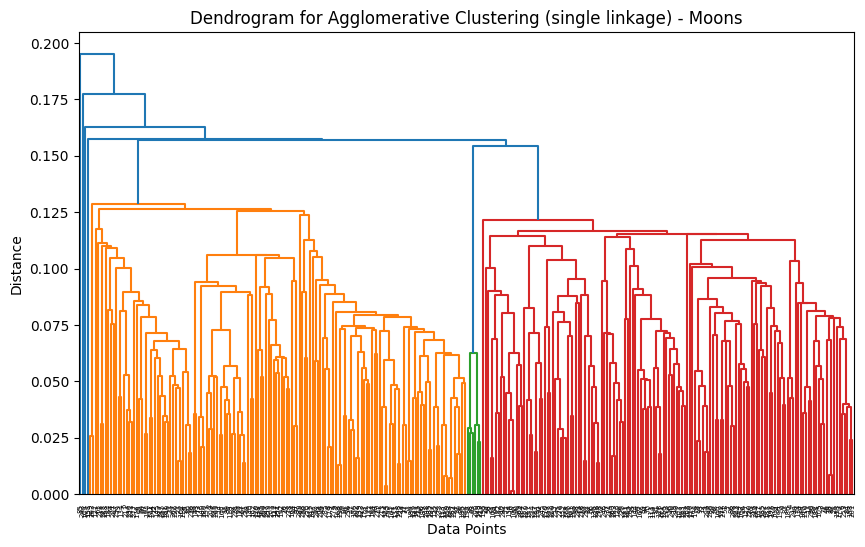

Linkage method: complete



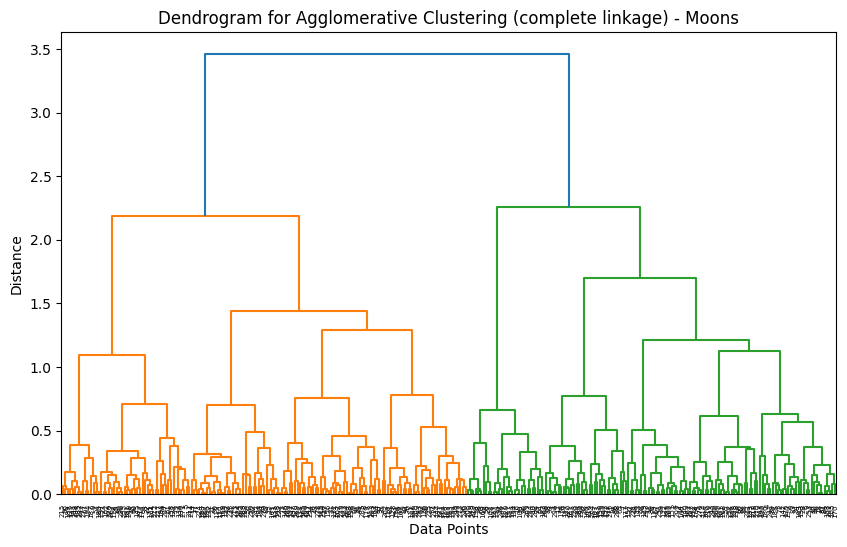

Linkage method: average



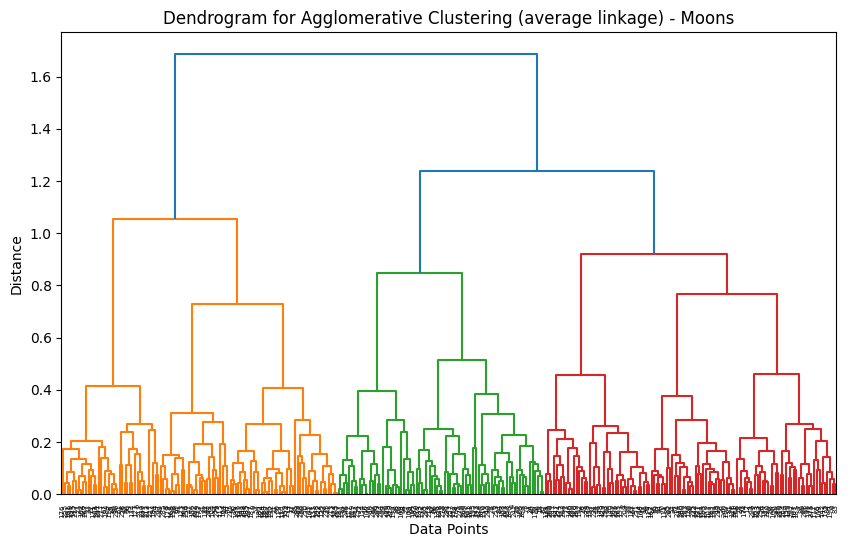

Linkage method: centroid



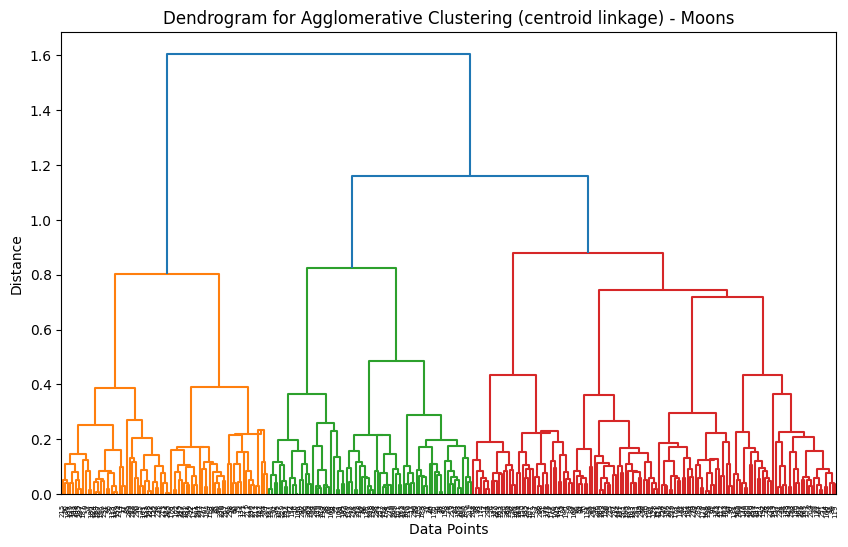

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

datasets2 = [
    ("Moons", make_moons(n_samples=300, noise=0.1, random_state=0)),
]

linkage_methods = ['single', 'complete', 'average', 'centroid']

for dataset_name, (X, y) in datasets2:
    print(f"Dataset: {dataset_name}\n")

    for linkage_method in linkage_methods:
        print(f"Linkage method: {linkage_method}\n")

        Z = linkage(X, method=linkage_method)

        plt.figure(figsize=(10, 6))
        dendrogram(Z)
        plt.title(f'Dendrogram for Agglomerative Clustering ({linkage_method} linkage) - {dataset_name}')
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        plt.show()


Optimal number of clusters for Moons(single): 3

Optimal number of clusters for Moons(complete): 2

Optimal number of clusters for Moons(average): 3

Optimal number of clusters for Moons(centroid): 3

Dataset: Circles

Linkage method: single



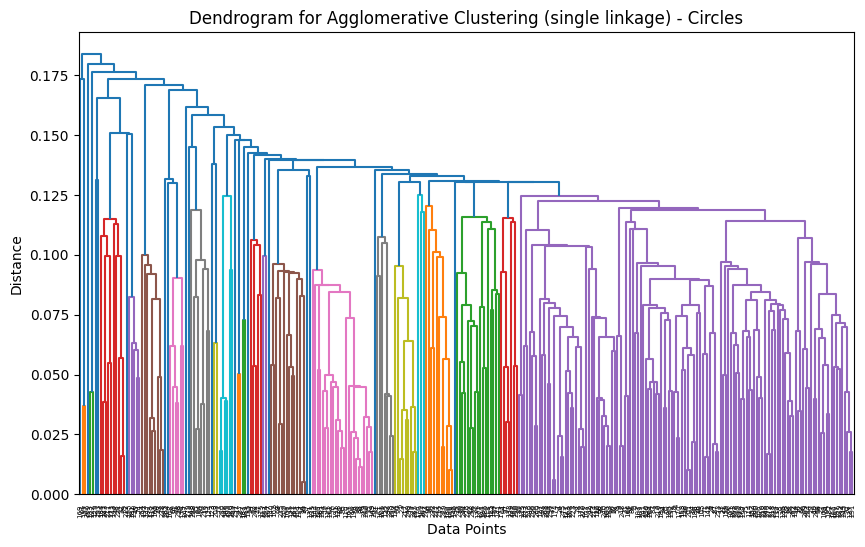

Linkage method: complete



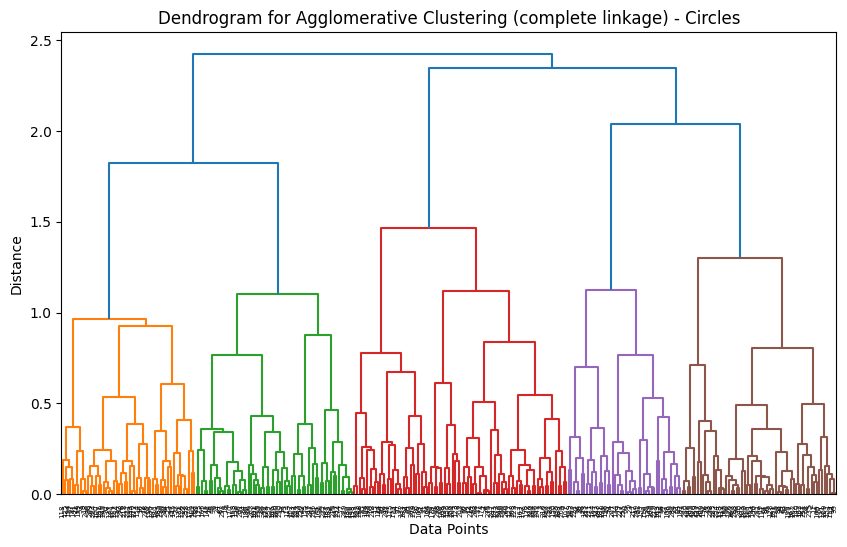

Linkage method: average



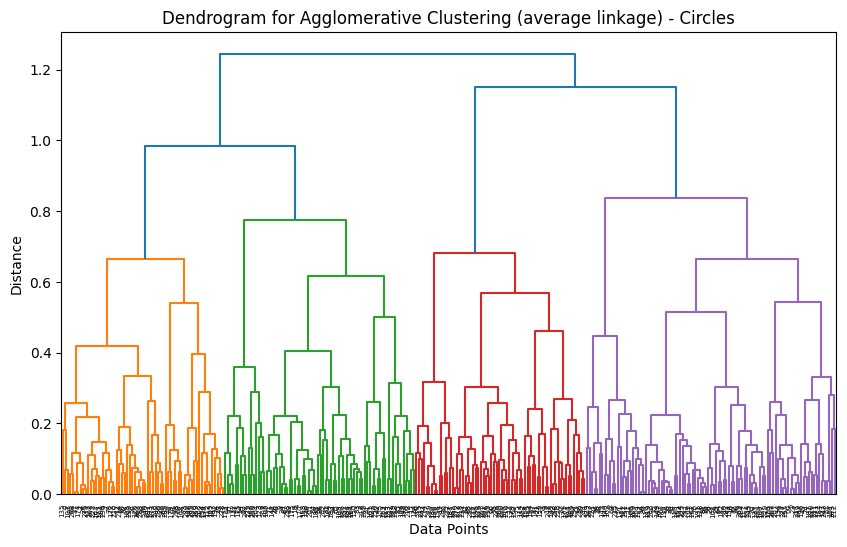

Linkage method: centroid



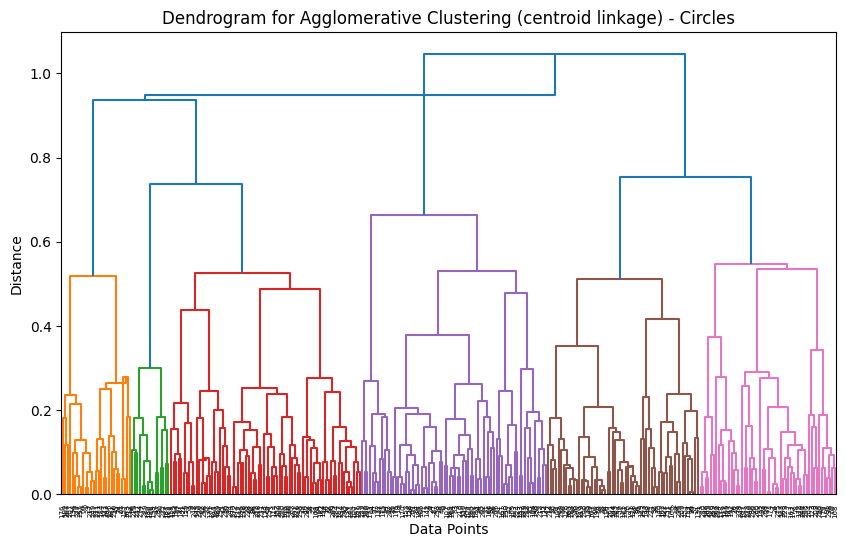

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

datasets2 = [
    ("Circles", make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)),
]

linkage_methods = ['single', 'complete', 'average', 'centroid']

for dataset_name, (X, y) in datasets2:
    print(f"Dataset: {dataset_name}\n")

    for linkage_method in linkage_methods:
        print(f"Linkage method: {linkage_method}\n")

        Z = linkage(X, method=linkage_method)

        plt.figure(figsize=(10, 6))
        dendrogram(Z)
        plt.title(f'Dendrogram for Agglomerative Clustering ({linkage_method} linkage) - {dataset_name}')
        plt.xlabel('Data Points')
        plt.ylabel('Distance')
        plt.show()


Optimal number of clusters for Circles(single): 22

Optimal number of clusters for Circles(complete): 5

Optimal number of clusters for Circles(average): 4

Optimal number of clusters for Circles(centroid): 6

In [30]:

kmeans_blob = KMeans(init='k-means++', n_clusters=3)
dbscan_blob = DBSCAN(algorithm='auto', eps=0.7, min_samples=4)
agglomerative_blob = AgglomerativeClustering(linkage='average',metric='euclidean', n_clusters=3)

kmeans_moon = KMeans(init='k-means++', n_clusters=6)
dbscan_moon = DBSCAN(algorithm='auto', eps=0.175, min_samples=4)
agglomerative_moon = AgglomerativeClustering(linkage='average',metric='euclidean', n_clusters=3)

kmeans_circle = KMeans(init='k-means++', n_clusters=4)
dbscan_circle = DBSCAN(algorithm='auto', eps=0.2, min_samples=4)
agglomerative_circle = AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)


algorithms_optimal = {
    'Blobs': {'KMeans++': kmeans_blob, 'DBSCAN': dbscan_blob, 'Agglomerative Clustering': agglomerative_blob},
    'Moons': {'KMeans++': kmeans_moon, 'DBSCAN': dbscan_moon, 'Agglomerative Clustering': agglomerative_moon},
    'Circles': {'KMeans++': kmeans_circle, 'DBSCAN': dbscan_circle, 'Agglomerative Clustering': agglomerative_circle}
}


In [31]:
X_blob, y_blob = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=100)
X_moon, y_moon = make_moons(n_samples=300, noise=0.05, random_state=100)
X_circle, y_circle = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=100)

datasets = {
    'Blobs': X_blob,
    'Moons': X_moon,
    'Circles': X_circle
}


for dataset_name, dataset in datasets.items():
    print(f"Evaluation for {dataset_name}:")
    for algo_name, algo in algorithms_optimal[dataset_name].items():

        start_time = time.time()
        cluster_labels = algo.fit_predict(dataset)
        end_time = time.time()

        runtime = end_time - start_time
        unique_labels = set(cluster_labels)

        if len(unique_labels) < 2 or (len(unique_labels) == 2 and -1 in unique_labels):
            print(f"{algo_name}: Less than 2 clusters found, Runtime: {runtime:.2f} seconds")
            continue

        silhouette = silhouette_score(dataset, cluster_labels)
        db_score = davies_bouldin_score(dataset, cluster_labels)
        print(f"{algo_name}: Silhouette Score = {silhouette:.2f}, Davies-Bouldin Score = {db_score:.2f}, Runtime: {runtime:.2f} seconds")

    print("\n")

Evaluation for Blobs:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans++: Silhouette Score = 0.90, Davies-Bouldin Score = 0.14, Runtime: 0.54 seconds
DBSCAN: Silhouette Score = 0.86, Davies-Bouldin Score = 1.30, Runtime: 0.00 seconds
Agglomerative Clustering: Silhouette Score = 0.90, Davies-Bouldin Score = 0.14, Runtime: 0.00 seconds


Evaluation for Moons:
KMeans++: Silhouette Score = 0.51, Davies-Bouldin Score = 0.60, Runtime: 0.12 seconds
DBSCAN: Silhouette Score = 0.33, Davies-Bouldin Score = 1.18, Runtime: 0.00 seconds
Agglomerative Clustering: Silhouette Score = 0.41, Davies-Bouldin Score = 0.92, Runtime: 0.00 seconds


Evaluation for Circles:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans++: Silhouette Score = 0.38, Davies-Bouldin Score = 0.81, Runtime: 0.15 seconds
DBSCAN: Silhouette Score = 0.11, Davies-Bouldin Score = 154.76, Runtime: 0.00 seconds
Agglomerative Clustering: Silhouette Score = 0.35, Davies-Bouldin Score = 0.85, Runtime: 0.00 seconds




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


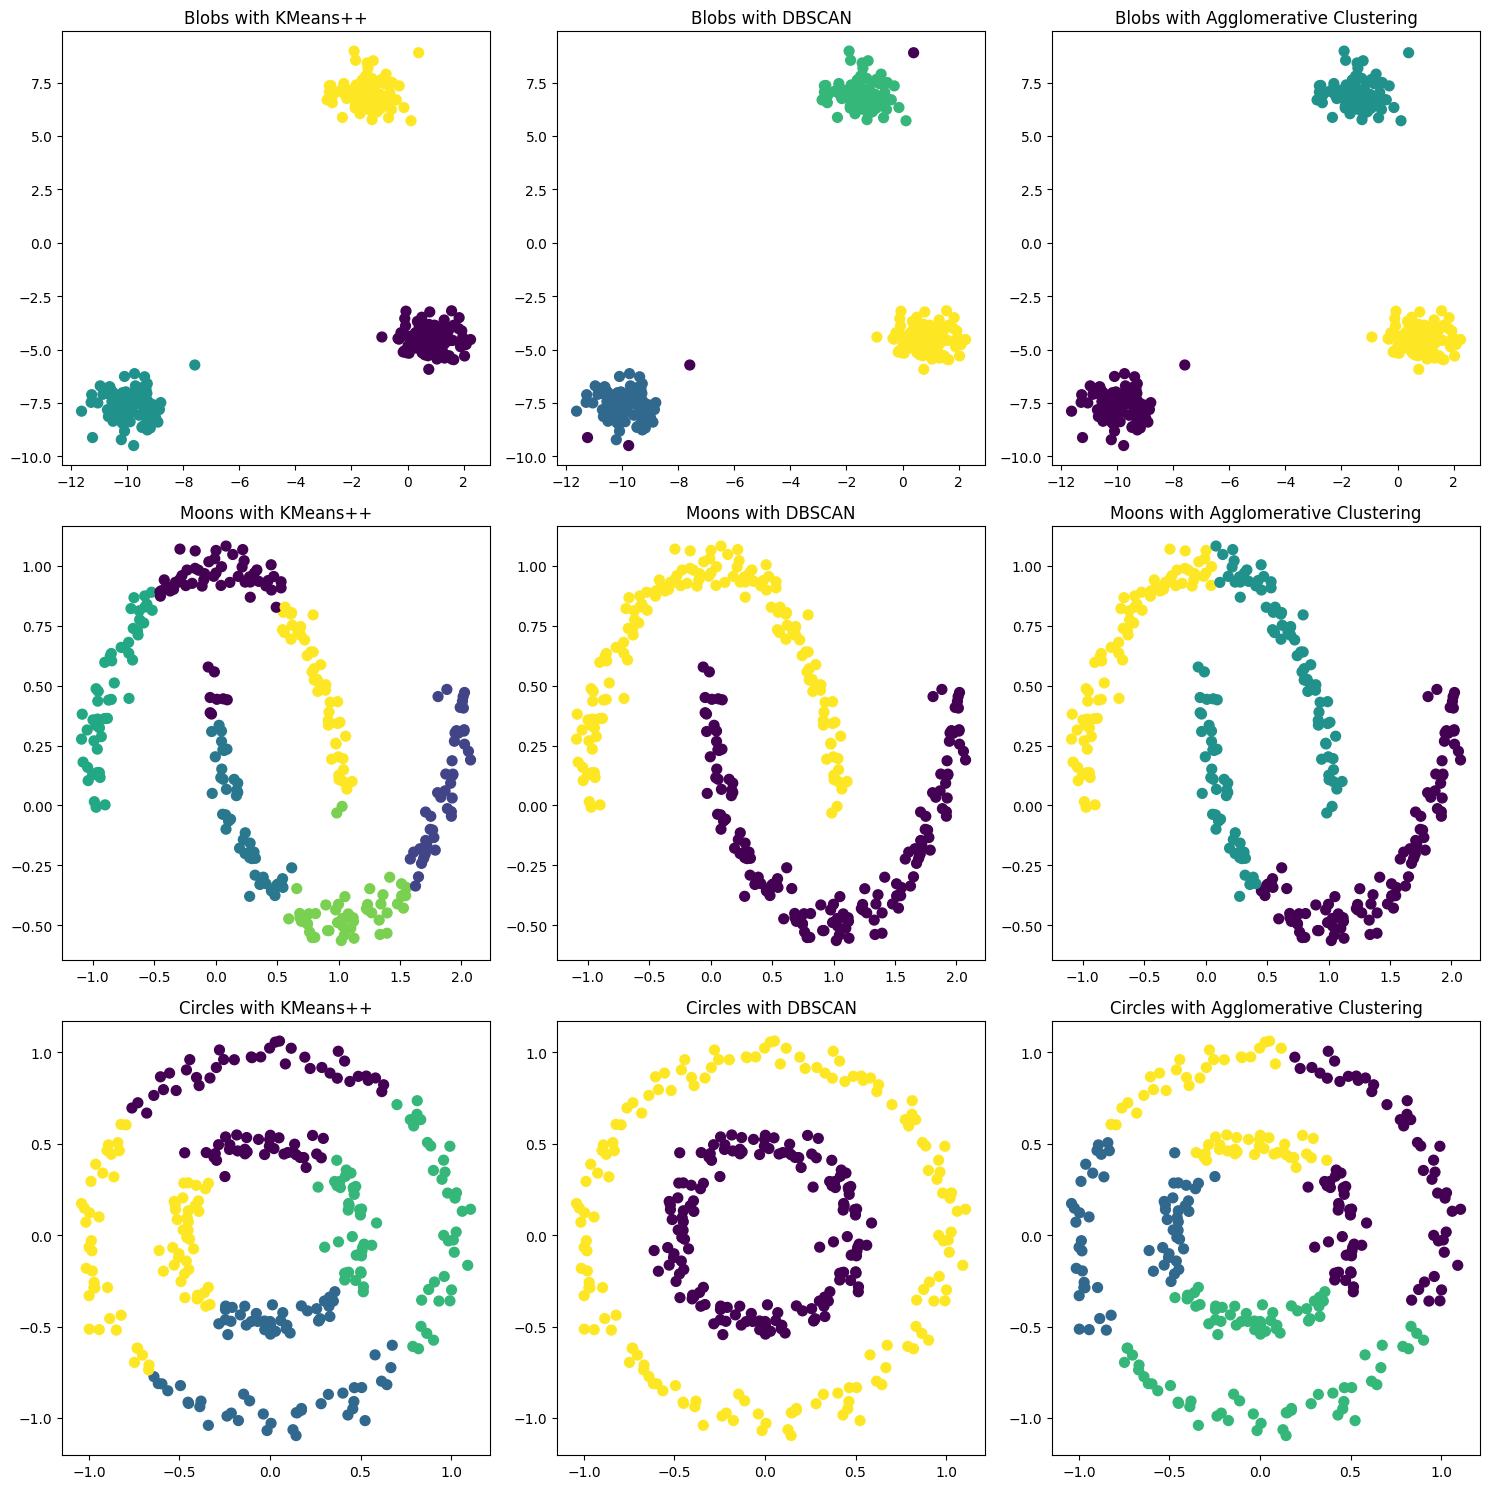

In [32]:
plt.figure(figsize=(15, 15))
for idx, (dataset_name, dataset) in enumerate(datasets.items()):
    for jdx, (algo_name, algo) in enumerate(algorithms_optimal[dataset_name].items()):
        cluster_labels = algo.fit_predict(dataset)

        plt.subplot(len(datasets), len(algorithms_optimal[dataset_name]), idx*len(algorithms_optimal[dataset_name]) + jdx + 1)
        plt.scatter(dataset[:, 0], dataset[:, 1], c=cluster_labels, s=50, cmap='viridis')
        plt.title(f"{dataset_name} with {algo_name}")

plt.tight_layout()
plt.show()

# Phase 3: Further Comparison

### Phase 3.1: Scalability

#### Blob Shape

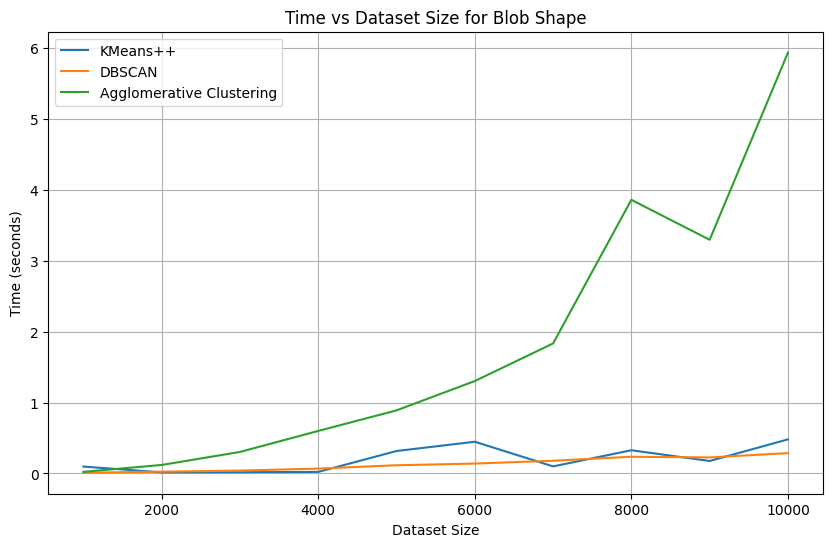

In [33]:
# chosen set of params
algorithms = {
    'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3, linkage='ward')
}

dataset_sizes = np.arange(1000, 11000, 1000)


results = {algo_name: [] for algo_name in algorithms.keys()}

for size in dataset_sizes:
    X, _ = make_blobs(n_samples=size, centers=3, cluster_std=0.60, random_state=0)

    for algo_name, algo in algorithms.items():
        # Measure runtime
        start_time = time.time()
        algo.fit(X)
        end_time = time.time()


        results[algo_name].append(end_time - start_time)

# Plotting
plt.figure(figsize=(10, 6))
for algo_name, runtimes in results.items():
    plt.plot(dataset_sizes, runtimes, label=algo_name)

plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Time vs Dataset Size for Blob Shape')
plt.legend()
plt.grid(True)
plt.show()


#### Moon Shape

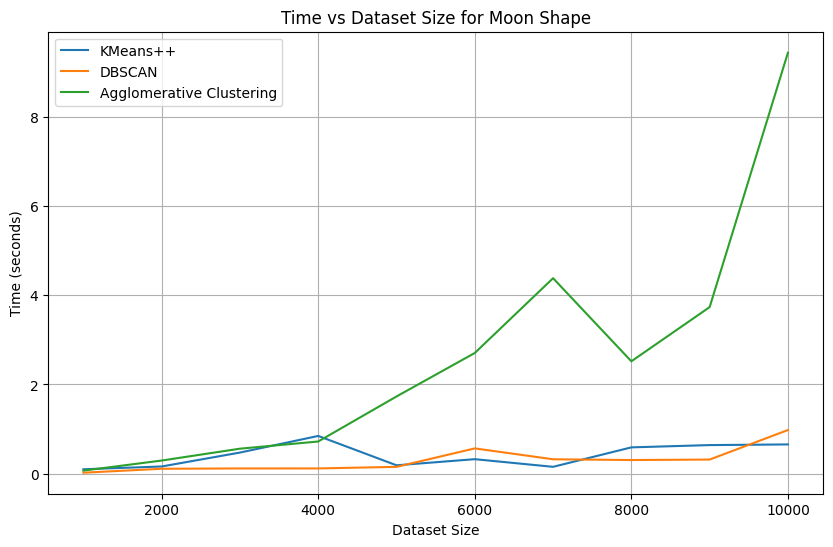

In [34]:

algorithms = {
    'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3, linkage='ward')
}

dataset_sizes = np.arange(1000, 11000, 1000)

results = {algo_name: [] for algo_name in algorithms.keys()}

for size in dataset_sizes:
    X, _ = make_moons(n_samples=size, noise=0.05, random_state=100)

    for algo_name, algo in algorithms.items():
        # Measure runtime
        start_time = time.time()
        algo.fit(X)
        end_time = time.time()

        results[algo_name].append(end_time - start_time)

# Plotting
plt.figure(figsize=(10, 6))
for algo_name, runtimes in results.items():
    plt.plot(dataset_sizes, runtimes, label=algo_name)

plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Time vs Dataset Size for Moon Shape')
plt.legend()
plt.grid(True)
plt.show()


#### Circle Shape

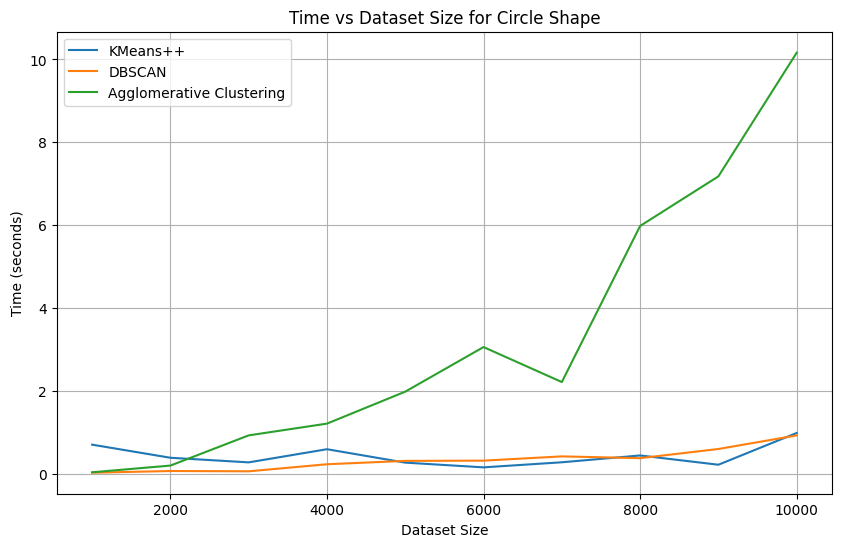

In [35]:

algorithms = {
    'KMeans++': KMeans(n_clusters=3, init='k-means++', random_state=0, n_init=10),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3, linkage='ward')
}

dataset_sizes = np.arange(1000, 11000, 1000)

results = {algo_name: [] for algo_name in algorithms.keys()}

for size in dataset_sizes:
    X, _ = make_circles(n_samples=size, factor=0.5, noise=0.05, random_state=100)


    for algo_name, algo in algorithms.items():

        start_time = time.time()
        algo.fit(X)
        end_time = time.time()

        results[algo_name].append(end_time - start_time)

plt.figure(figsize=(10, 6))
for algo_name, runtimes in results.items():
    plt.plot(dataset_sizes, runtimes, label=algo_name)

plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Time vs Dataset Size for Circle Shape')
plt.legend()
plt.grid(True)
plt.show()


### Phase 3.2: Noise

In [64]:
X_blob, y_blob = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=100)
X_moon, y_moon = make_moons(n_samples=300, noise=0.05, random_state=100)
X_circle, y_circle = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=100)

# Add noise to Blobs
blob_noise_x = np.random.normal(0, 0.60, X_blob.shape[0])
blob_noise_y = np.random.normal(0, 0.60, X_blob.shape[0])
X_blob_noise = X_blob + np.vstack((blob_noise_x, blob_noise_y)).T

# Add noise to Moons
moon_noise_x = np.random.normal(0, 0.1, X_moon.shape[0])
moon_noise_y = np.random.normal(0, 0.1, X_moon.shape[0])
X_moon_noise = X_moon + np.vstack((moon_noise_x, moon_noise_y)).T

# Add noise to Circles
circle_noise_x = np.random.normal(0, 0.05, X_circle.shape[0])
circle_noise_y = np.random.normal(0, 0.05, X_circle.shape[0])
X_circle_noise = X_circle + np.vstack((circle_noise_x, circle_noise_y)).T



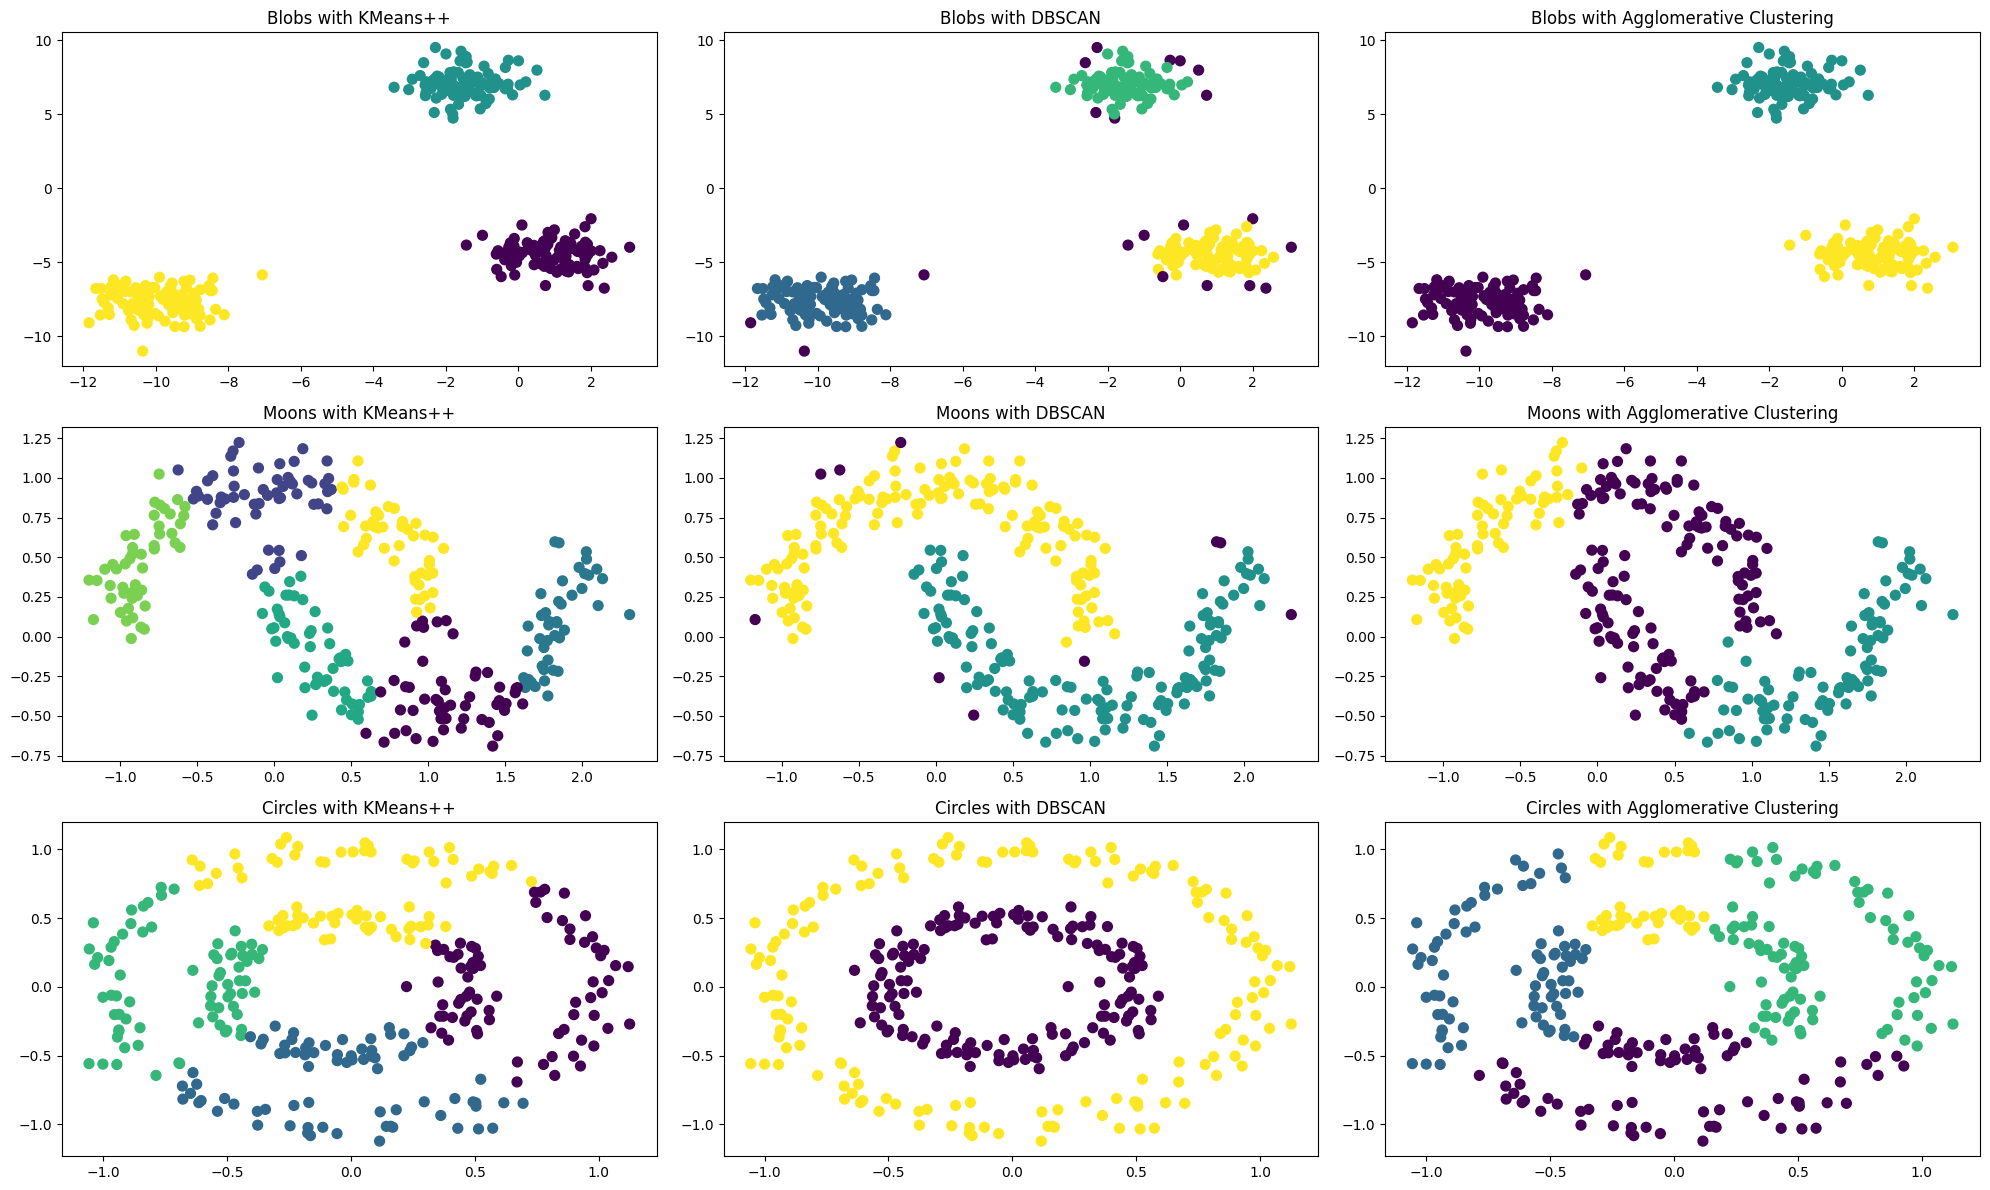

In [65]:
kmeans_blob = KMeans(init='k-means++', n_clusters=3, n_init=10)
dbscan_blob = DBSCAN(algorithm='auto', eps=0.7, min_samples=6)
agglomerative_blob = AgglomerativeClustering(linkage='average',metric='euclidean', n_clusters=3)

kmeans_moon = KMeans(init='k-means++', n_clusters=6, n_init=10)
dbscan_moon = DBSCAN(algorithm='auto', eps=0.175, min_samples=6)
agglomerative_moon = AgglomerativeClustering(linkage='average',metric='euclidean', n_clusters=3)

kmeans_circle = KMeans(init='k-means++', n_clusters=4, n_init=10)
dbscan_circle = DBSCAN(algorithm='auto', eps=0.2, min_samples=6)
agglomerative_circle = AgglomerativeClustering(linkage='average', metric='euclidean', n_clusters=4)

algorithms_by_dataset = {
    'Blobs': {'KMeans++': kmeans_blob, 'DBSCAN': dbscan_blob, 'Agglomerative Clustering': agglomerative_blob},
    'Moons': {'KMeans++': kmeans_moon, 'DBSCAN': dbscan_moon, 'Agglomerative Clustering': agglomerative_moon},
    'Circles': {'KMeans++': kmeans_circle, 'DBSCAN': dbscan_circle, 'Agglomerative Clustering': agglomerative_circle}
}

datasets = {
    'Blobs': X_blob_noise,
    'Moons': X_moon_noise,
    'Circles': X_circle_noise
}

fig, axes = plt.subplots(len(datasets), len(algorithms_by_dataset['Blobs']), figsize=(20, 12))

for dataset_idx, (dataset_name, X) in enumerate(datasets.items()):
    for algo_idx, (algo_name, algo) in enumerate(algorithms_by_dataset[dataset_name].items()):
        cluster_labels = algo.fit_predict(X)
        ax = axes[dataset_idx, algo_idx]
        ax.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
        ax.set_title(f"{dataset_name} with {algo_name}")

plt.tight_layout()
plt.show()
